In [2]:
!pip install pandas matplotlib numpy scikit-learn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#Data Path




In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/UCI Energy Efficiency/ENB2012_data.csv')

#Reading the Data

In [5]:
df = pd.read_csv("/content/drive/MyDrive/UCI Energy Efficiency/ENB2012_data.csv")
print(df.head())

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


#Dataset Inspection

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB
None


In [7]:
print(df.isnull().sum())

X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64


In [8]:
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

In [9]:
print(df.dtypes)

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object


In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 527


In [11]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


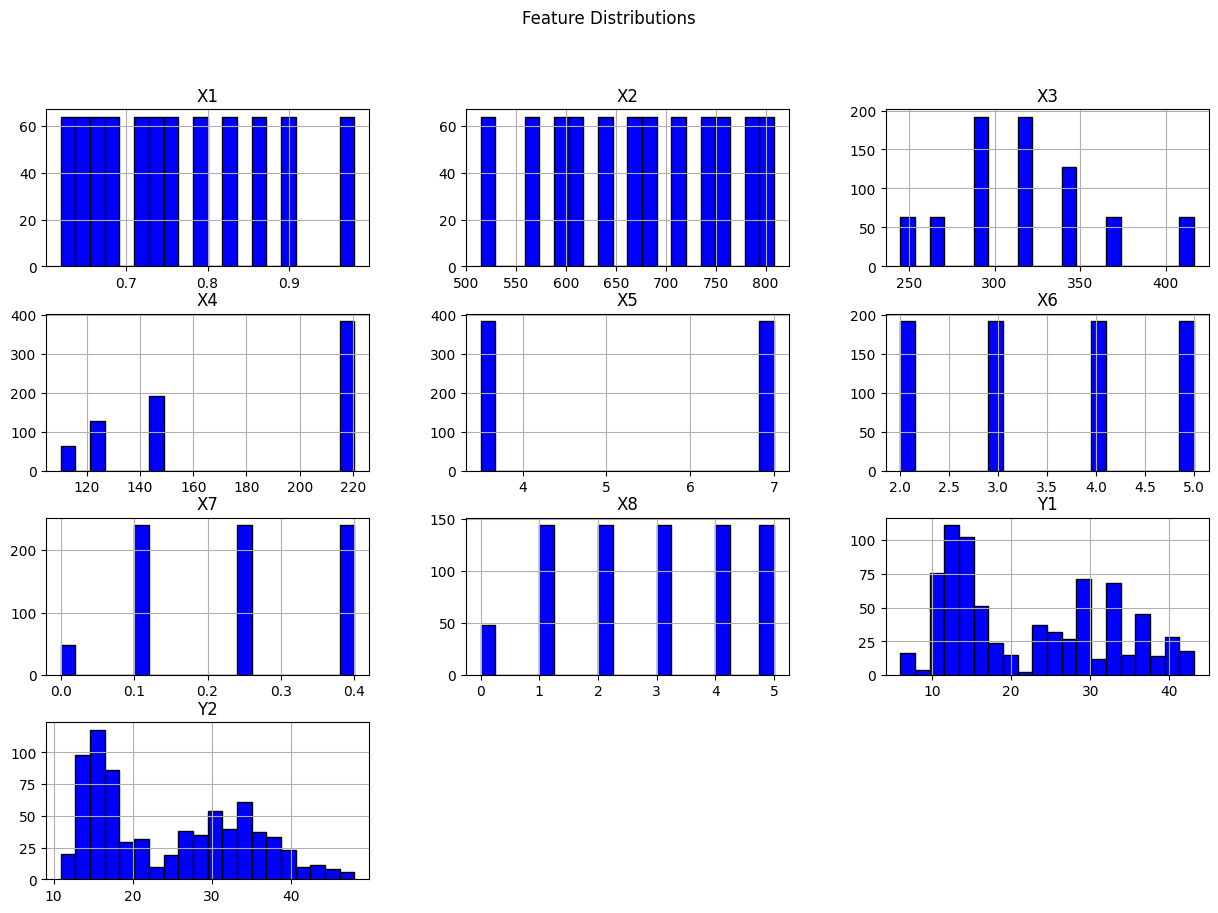

In [12]:
df.hist(bins=20,figsize=(15,10),color='blue',edgecolor = 'black')
plt.suptitle("Feature Distributions")
plt.show()

#Heating Load vs Relative Compactness

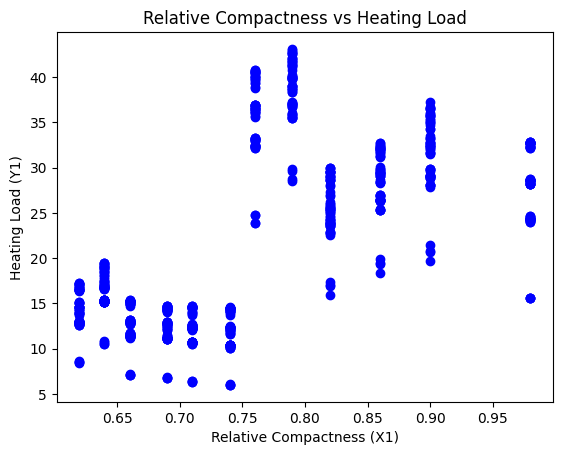

In [13]:
plt.scatter(df['X1'],df['Y1'],color = 'blue')
plt.xlabel("Relative Compactness (X1)")
plt.ylabel("Heating Load (Y1)")
plt.title("Relative Compactness vs Heating Load")
plt.show()

#Cooling Load vs Surface Area

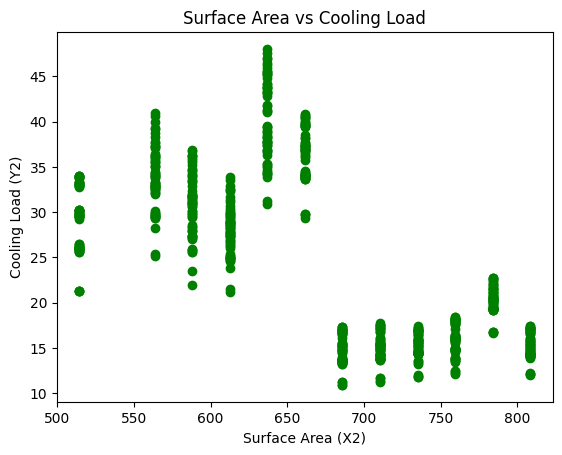

In [14]:
plt.scatter(df['X2'],df['Y2'],color = 'green')
plt.xlabel("Surface Area (X2)")
plt.ylabel("Cooling Load (Y2)")
plt.title("Surface Area vs Cooling Load")
plt.show()

#Feature and Target selection


In [15]:
X = df[['X1']]
y = df['Y1']

print(X.shape,y.shape)

(1296, 1) (1296,)


#Visualize

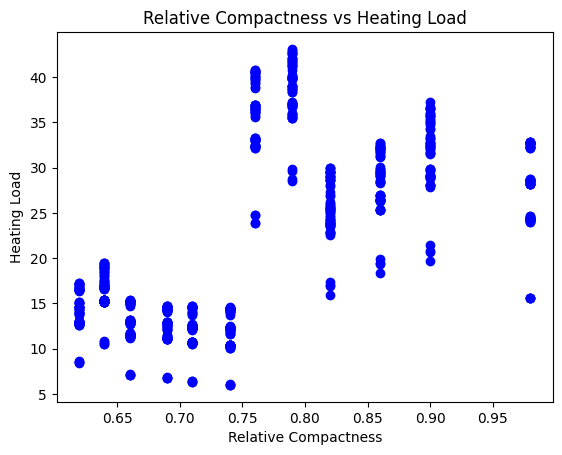

In [16]:
plt.scatter(X,y,color='blue')
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.title("Relative Compactness vs Heating Load")
plt.show()

#Training & Testing Split

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

print("Training set size: ",X_train.shape)
print("Testing set size: ",X_test.shape)

Training set size:  (1036, 1)
Testing set size:  (260, 1)


#Train

In [21]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

X1    424
dtype: int64
424


In [35]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print("Coefficient (slope): ",model.coef_[0])
print("Intercept: ",model.intercept_)

Coefficient (slope):  59.47072300381366
Intercept:  -23.210049652280077


#Make Prediction

In [37]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [38]:
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(results.head())

     Actual  Predicted
598   40.57  21.987700
346   29.27  27.934772
745   14.19  20.798285
478   14.61  13.661799
628   34.24  30.313601


#Error and Accuracy

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE): ",mae)
print("Mean Squared Error (MSE): ",mse)
print("R-squared (R2): ",r2)

Mean Absolute Error (MAE):  6.058376741504266
Mean Squared Error (MSE):  62.495599540627005
R-squared (R2):  0.40004330620316075


#Visualize Model Prediction

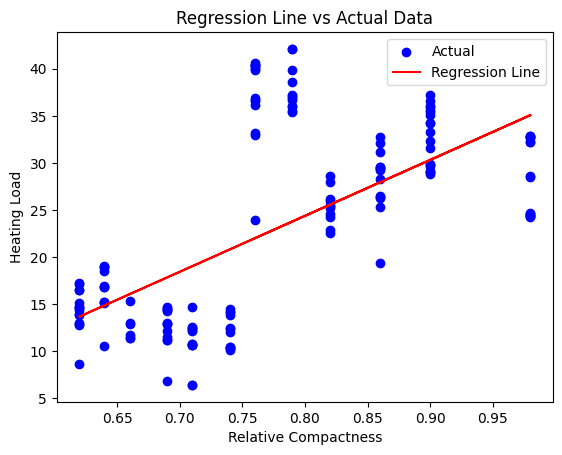

In [40]:
plt.scatter(X_test,y_test,color='blue',label='Actual')
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.title("Regression Line vs Actual Data")
plt.legend()
plt.show()

#Actual vs Predicted

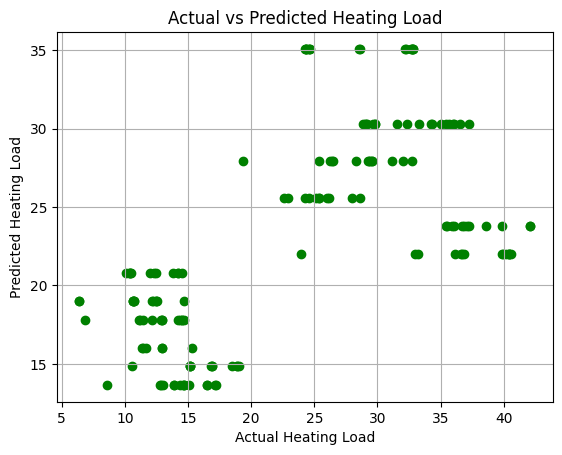

In [44]:
plt.scatter(y_test,y_pred,color='green')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.grid(True)
plt.savefig("scatter_plot.png")
plt.show()


#For User Input


In [45]:
def predict_heating_load():
  print("Enter values for the following features:")

  relative_compactness = float(input("Relative Compactness (X1): "))
  surface_area = float(input("Surface Area (X2): "))
  wall_area = float(input("Wall Area (X3): "))
  roof_area = float(input("Roof Area (X4): "))
  overall_height = float(input("Overall Height (X5): "))
  orientation = int(input("Orientation (X6): "))
  glazing_area = float(input("Glazing Area (X7): "))
  glazing_area_distribution = int(input("Glazing Area Distribution (X8): "))


  user_data = [[
      relative_compactness,
      surface_area,
      wall_area,
      roof_area,
      overall_height,
      orientation,
      glazing_area,
      glazing_area_distribution
  ]]

  prediction = model.predict(user_data)
  print(f"Predicted Heating Load:{prediction[0]:.2f}")

  predict_heating_load()